In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
obs = 15
np.random.seed(15)
data = np.random.randint(0,5, obs*5).reshape(obs,5)
data_unique = np.unique(data, axis=0)
xs = np.c_[np.ones([data_unique.shape[0]]), data_unique] 
xs.shape

(15, 6)

In [3]:
xs[:4]

array([[1., 0., 3., 0., 4., 3.],
       [1., 0., 3., 2., 4., 2.],
       [1., 0., 4., 0., 4., 3.],
       [1., 0., 4., 4., 4., 3.]])

In [4]:
ys = np.random.choice(list(range(1,10)), obs)
ys.resize(obs,1)
ys[:4]

array([[5],
       [3],
       [3],
       [4]])

In [5]:
weights = lambda ins, outs: np.random.randn(ins, outs)

In [64]:
ins = 5
outs = 1
nodes = 5
lr = .01

w0 = weights(ins+1, nodes)
w1 = weights(nodes, nodes) 
w2 = weights(nodes, outs)
err = []

In [65]:
for i in range(5000):
    x0 = xs
    
    z0 = x0 @ w0; x1 = np.sin(z0)
    z1 = x1 @ w1; x2 = np.sin(z1)
    yh = (x2 @ w2)    
    
    e = (yh - ys) * 1
    
    e2 = (e)
    e1 = (e2 @ w2.T) * np.cos(z1)
    e0 = (e1 @ w1.T) * np.cos(z0)
    
    w2 -= (x2.T @ e) * lr
    w1 -= (x1.T @ e) * lr
    w0 -= (x0.T @ e0) * lr 
    
    e = np.sum(np.abs(e))
    
    if e < .01:
        print('we have converged after {} iterations'.format(i))
        print(w1)
        break
    err.append(e)

In [66]:
len(err), min(err)

(5000, 46.75869183465088)

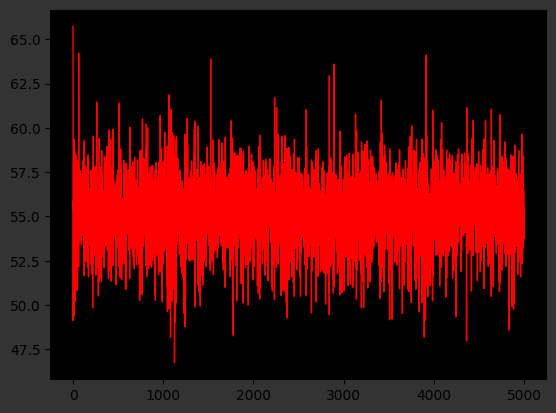

In [67]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [11]:
yh

array([[ 0.03681032],
       [-0.04579357],
       [-0.30544881],
       [-0.78060126],
       [ 0.2958162 ],
       [ 1.45632876],
       [ 1.37847006],
       [-1.24519489],
       [ 0.18353663],
       [ 1.37544609],
       [-0.38751291],
       [ 0.73385038],
       [-0.68216515],
       [ 0.10175017],
       [-0.51763359]])

In [12]:
ys

array([[5],
       [3],
       [3],
       [4],
       [4],
       [5],
       [4],
       [6],
       [4],
       [1],
       [1],
       [7],
       [2],
       [3],
       [3]])